#### This script reads in table from SoFiA then converts it to appropriate units.

In [87]:
from astropy.io import fits
from math import pi,log
import numpy as np
import matplotlib.pyplot as plt

In [61]:

hdr = fits.getheader('Thesis/Data/ATC/ATC2/Noisy_data/HI_plus_noise.smoothed_vel_axis.FITS')
data1 = open('Thesis/Data/ATC/ATC2/Noisy_data/SoFiA/sofia.txt','r')
data = data1.readlines()
n=len(data)

In [82]:
BMAJ,BMIN =  6.4913E-03 ,4.6136E-03
cdelt= hdr.get('cdelt2')
dv   = hdr.get('cdelt3')
bmaj = BMAJ / cdelt  # beam major axis in pixels
bmin = BMIN / cdelt
beam_area =  4.0 * log(2.0) / (pi * bmaj * bmin)
H0 = 70.0
c  =3.e5
bala = open('Thesis/Data/ATC/ATC2/Noisy_data/SoFiA/SoFiA_Cal.txt','w')

In [83]:
for line in data:
    Id  = line[16:41]
    ra  = line[77:90]
    dec = line[92:106]
    vopt= line[109:122]
    w20  =line[127:135]
    w50 = line[141:148]
    f_int = line[168:174]
    F_int = float(f_int)*dv*beam_area
    D = (float(vopt)*1e-3)/H0
    hi_mass = (2.36e+5 * F_int *D**2)/(1.+(float(vopt)*1e-3)/c)
    HI_mass = log(hi_mass)/log(10.)
    
    bala.writelines(Id+'  '+str(round(float(ra),3))+'  '+str(round(float(dec),3))+'  '+str(int(round(float(vopt)*1e-3,0)))+'   '+str(int(round(float(w20)*dv,0)))+'   '+'   '+str(int(round(float(w50)*dv,0)))+'   '+str(round(float(F_int),4))+'  '+str(int(round(D,0)))+'  '+str(round(HI_mass,3))+'\n')

data1.close()    
bala.close()

In [170]:
cal = np.loadtxt('Thesis/Data/ATC/ATC2/Noisy_data/SoFiA/sofia_par.txt')
vel,Hi_mass= cal[:,2],cal[:,-1]

sig = 0.4e-3

def Yima(v_i,v_f,w):
    Vel = [x for x in np.linspace(4000.,v_f+1000.,100)]
    
    S_int = 3.*sig*w
    d =  np.array(Vel)/70.

    hi_mass = 2.36e+5 * S_int* d**2
    HI_mass = []
    for x in hi_mass:
        mass = log(x)/log(10.)
        HI_mass.append(mass)
    Vel = np.array(Vel)
    HI_mass = np.array(HI_mass)
    return Vel, HI_mass

vv,uu=Yima(vel.min(),vel.max(),50.)
vv1,uu1=Yima(vel.min(),vel.max(),150.) 
vv2,uu2=Yima(vel.min(),vel.max(),250.) 
#Import all sources from clean cube
ed = np.loadtxt('Thesis/Data/ATC/ATC2/clean_data/props.txt')
z,mass = ed[:,2],ed[:,3]
velo = z*c
Mass=[]
for x in mass:
    Mass.append(log(x)/log(10.))

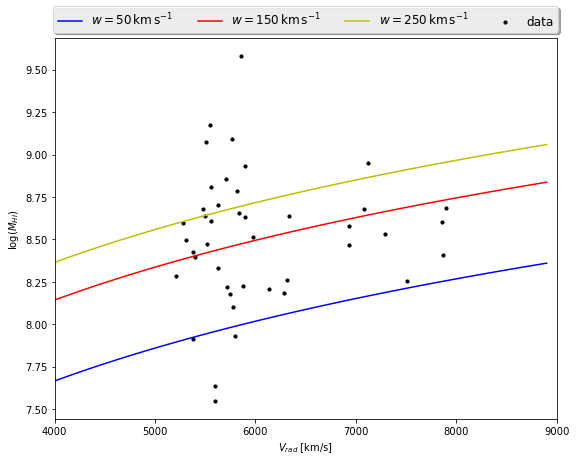

In [179]:
plt.figure(figsize=(9,7))
plt.scatter(vel,Hi_mass,s=10,c='k',label='data')
#plt.scatter(velo,Mass,s=10,c='g',label='data1')     #from ed
plt.plot(vv,uu,'b-',label=r'$w=50 \, \mathrm{km\,s^{-1}}$')
plt.plot(vv1,uu1,'r-',label=r'$w=150 \, \mathrm{km\,s^{-1}}$')
plt.plot(vv2,uu2,'y-',label=r'$w=250 \, \mathrm{km\,s^{-1}}$')
plt.xlim(4000.,9000.)
#plt.ylim(7,10.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4, fancybox=True, shadow=True,numpoints=1,fontsize='large')
plt.xlabel(r'$V_{rad}$ [km/s]')
plt.ylabel(r'$\log \left(M_{HI} \right)$')
plt.show()
